<a href="https://colab.research.google.com/github/vineeta007/ARTIFICAL-NEURAL-NETWORK/blob/main/ANN_HCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Reading of data

In [ ]:
# Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

Data preprocessing training testing

In [ ]:
# Data preprocessing
X_train = train_data.iloc[:, 1:].values.astype('float32') / 255
y_train = train_data.iloc[:, 0].values
X_test = test_data.values.astype('float32') / 255


splitting of data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


This code trains the neural network model for 10 epochs using batches of size 32, while also validating its performance using the validation data.

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
58/58 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 2/10
58/58 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 3/10
58/58 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 4/10
58/58 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 5/10
58/58 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 6/10
58/58 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 7/10
58/58 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 8/10
58/58 [==============================] - 1s 10ms

print validation accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {test_accuracy}")


15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0852
Validation Accuracy: 0.08515284210443497


Prediction of the output dataset

In [ ]:
predictions = model.predict(X_test)

198/198 [==============================] - 0s 2ms/step


15/15 [==============================] - 0s 3ms/step


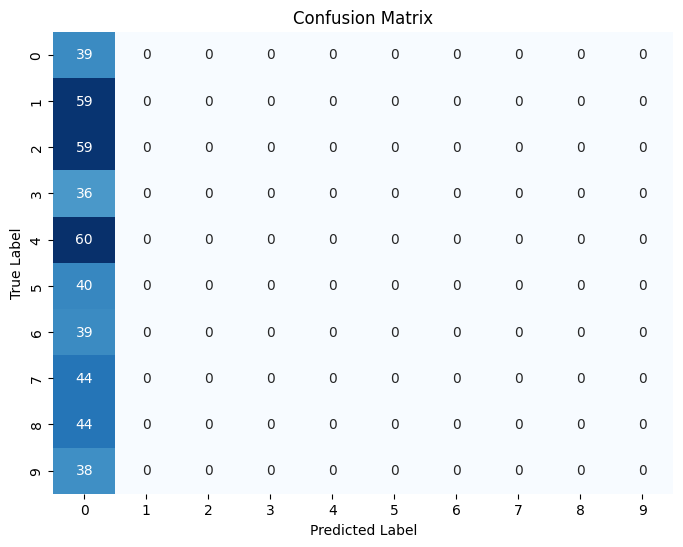

Epoch 1/10
58/58 [==============================] - 3s 20ms/step - loss: nan - accuracy: 0.4007 - val_loss: nan - val_accuracy: 0.0852
Epoch 2/10
58/58 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 3/10
58/58 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 4/10
58/58 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 5/10
58/58 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 6/10
58/58 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 7/10
58/58 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.1037 - val_loss: nan - val_accuracy: 0.0852
Epoch 8/10
58/58 [==============================] - 1s 

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Error Analysis
val_predictions = model.predict(X_val)
val_pred_labels = np.argmax(val_predictions, axis=1)
conf_matrix = confusion_matrix(y_val, val_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Model Tuning - Example: Adding more layers and changing activation functions
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy after tuning: {test_accuracy}")

# Predict labels for test data
predictions = model.predict(X_test)

In [ ]:
# Save the trained model
model.save("handwritten_digit_recognition_model.h5")

# Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model("handwritten_digit_recognition_model.h5")

# Make predictions on test data using the loaded model
predictions = loaded_model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create submission file
submission_df = pd.DataFrame({'ImageId': sample_submission['ImageId'], 'Label': predicted_labels})
submission_df.to_csv("submission.csv", index=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


875/875 [==============================] - 4s 4ms/step


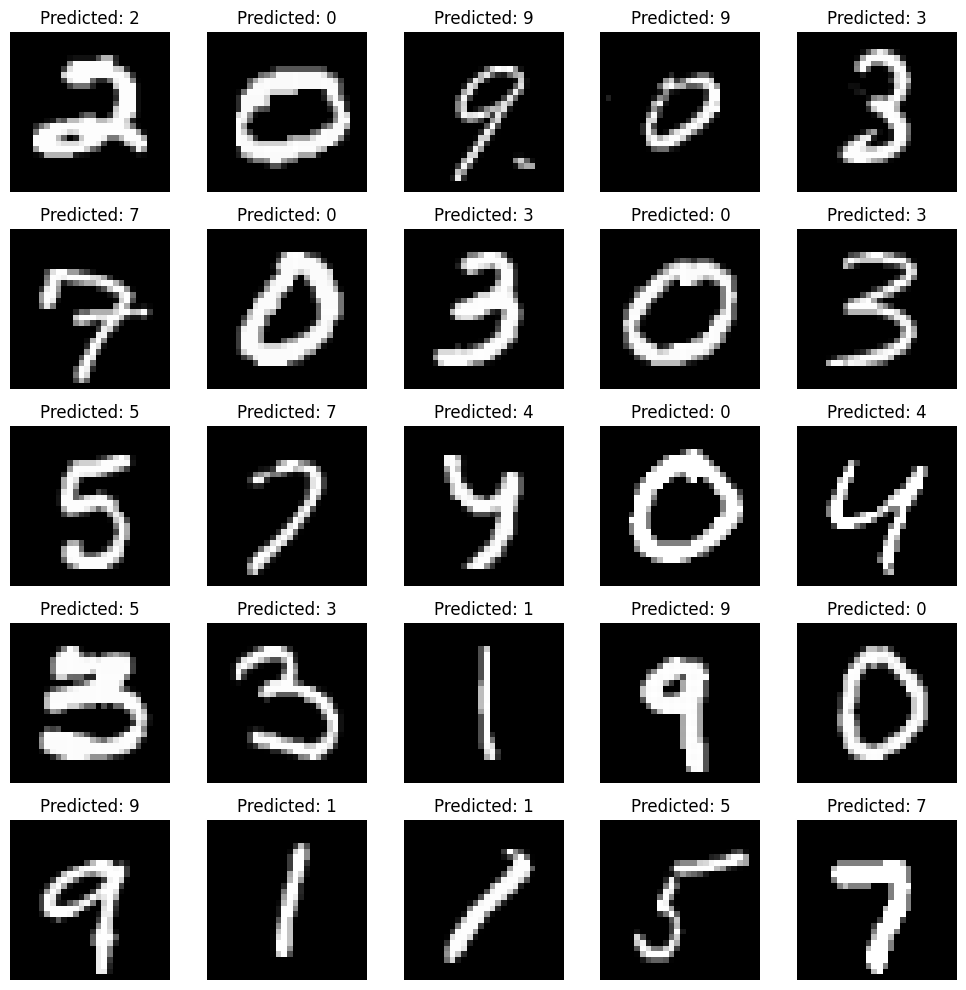

In [ ]:
# Visualize some sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()